# Predicting Customer Churn using Bank Customers

![Klee - Visual Analytics](https://github.com/nikbearbrown/Visual_Analytics/blob/main/IMG/Klee_Visual_Analytics.png?raw=true)


YouTube - https://www.youtube.com/c/NikBearBrown    
GitHub - https://github.com/nikbearbrown/Visual_Analytics   
Kaggle - https://www.kaggle.com/nikbearbrown   
Klee.ai (Visual AI) - http://klee.ai  


The goal of this notebook is to implement and understand the interpretation done by SHapley Additive exPlanations for a binary classification example - Customer Churn using Bank Customers.

In this notebook, I am implementing Random Forest model to predict the customer churn which has accuracy of 78% and understand how each feature has impact in the predictions using TreeExplainer.

I did feature selection using sk-learn's SelectKBest method but the outcome of feature selection did not justify the EDA results.

From the above summary plot, it can be inferred that gender_male, age, geography_france, IsActiveMember and number of prodcuts are most important features and this is conformed by EDA plot.

The feature age in the summary plot has highest importance which is conformed by EDA plot.

While considering balance as the only dependent feature the accuracy is 73.4% and considering gender as the only dependent feature the accuracy is 81.0% which means gender is more important feature than balance for churn prediction. But this is not supported by the summary plot.




#### # Problem with this notebook 

1. Error for plotting force plot 

2. Since its RF, normalization is not required, although I normalize getting this error ( explain)

3. One-hot encoding for gender and geography...


be clear

1. develop technique for ( how to understand shap)
exploring the techiques write all techiques that I am using

2. how did u do it using churn dataset binary classification example of any


Customer churn (also known as customer attrition) occurs when a customer stops using a company's products or services.

The goal of this notebook is to understand and predict customer churn for a bank usig Random forest and SHAP values. 

Intially, performed Exploratory Data Analysis (EDA) to identify and visualise the factors that contribute to customer churn. Then I used Random Forest to predict whether a customer will churn or not. Accuracy of the model is 78%.

The steps followed to achieve the goal are:

1. Read data from CSV file and checked for any missing values using info() of pandas library 
2. Performed Exploratory Data Analysis (EDA) to understand the data using pandas profiling report and dropped unneccesary columns
3. Analyzed the independent variables visually using histogram and box plots
4. Implemented data preprocessing by using one-hot encoding to encode the catogoreical variables
5. Performed data normalization in order normaliza the data
6. Splitting the data into train and test dataset by using 75% of the training data for actual training purposes, and once training is completed, using the remaining 25% of the training data to check the training accuracy of the trained model.
7. Since the data set is imbalanced, increasing the number of samples using SMOTE.
8. Training and predicting the output using Random Forest algorithm. The accuracy of the model is 78%.
9. Interpretation using SHAP - TreeExplainer is a package for explaining and interpreting predictions of tree-based machine learning models. The notion of interpretability is based on how close the inclusion of a feature takes the model toward its final prediction. For this reason, the result of this approach is "feature contributions" to the predictions.
10. 

## 2. Import libraries

Importing libraries:

Pandas for handling and analysing data,
Seaborn and Matplotlib for data visualization, and
Scikit-learn for building Machine Learning models.

In [9]:
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('precision', 3)
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_style('darkgrid')

from scipy.stats import chi2_contingency
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import scikitplot as skplt

label_size = 17

plt.rcParams['axes.labelsize'] = label_size
plt.rcParams['xtick.labelsize'] = label_size - 2
plt.rcParams['ytick.labelsize'] = label_size - 2
plt.rcParams['axes.titlesize'] = label_size
plt.rcParams['legend.fontsize'] = label_size - 2

random_state = 42
scoring_metric = 'recall'
comparison_dict = {}
comparison_test_dict = {}

%matplotlib inline

In [10]:
df = pd.read_csv('https://github.com/nikbearbrown/Visual_Analytics/raw/main/CSV/Churn_Modeling.csv')


print ('This dataset contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This dataset contains 10000 rows and 14 columns.


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
print (df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


##### Details about the dataset:

It consists of 10000 observations and 12 variables. Independent variables contain information about customers. Dependent variable refers to customer abandonment status.

Variables:

RowNumber — corresponds to the record (row) number and has no effect on the output. This column will be removed.

CustomerId — contains random values and has no effect on customer leaving the bank. This column will be removed.

Surname — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography — a customer’s location can affect their decision to leave the bank. 

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank. 

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

IsActiveMember — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

The info() method can give us valuable information such as the number of non-null values and the type of each feature:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no missing values in the dataset. 

Columns 'RowNumber', 'CustomerID' and 'Surname' are specific to each customer and can be dropped:

In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1, inplace = True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## 3. Exploratory data analysis

In [5]:
import pandas_profiling
df.profile_report()

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.529,96.653,350.00,584.00,652.000,718.000,850.00
Age,10000.0,38.922,10.488,18.00,32.00,37.000,44.000,92.00
Tenure,10000.0,5.013,2.892,0.00,3.00,5.000,7.000,10.00
Balance,10000.0,76485.889,62397.405,0.00,0.00,97198.540,127644.240,250898.09
NumOfProducts,10000.0,1.530,0.582,1.00,1.00,1.000,2.000,4.00
HasCrCard,10000.0,0.706,0.456,0.00,0.00,1.000,1.000,1.00
IsActiveMember,10000.0,0.515,0.500,0.00,0.00,1.000,1.000,1.00
EstimatedSalary,10000.0,100090.240,57510.493,11.58,51002.11,100193.915,149388.247,199992.48
Exited,10000.0,0.204,0.403,0.00,0.00,0.000,0.000,1.00


The most important things to note are:

    1. The age of customers ranges from 18 to 92, with a mean value approximately equal to 40,
    2. The mean (and median) tenure is 5 years, so the majority of customers is loyal (tenure > 3), and
    3. Approximately 50% of customers are active.
    
entropy of column

Text(0, 0.5, 'Count')

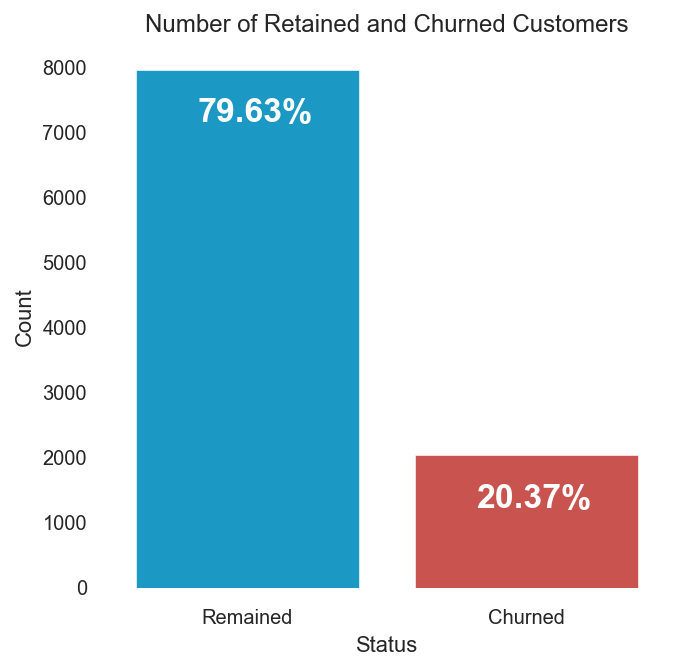

In [7]:
colors = ['#00A5E0', '#DD403A']

fig = plt.figure(figsize = (5, 5))

# plot the graph
sns.countplot(x = 'Exited', data = df, palette = colors)

for index, value in enumerate(df['Exited'].value_counts()):
    label =  '{}%'.format(round( (value/df['Exited'].shape[0])*100, 2)) 
    plt.annotate(label, xy = (index - 0.18, value - 800), color = 'w', fontweight = 'bold', size = label_size)

plt.title('Number of Retained and Churned Customers')
plt.xticks([0, 1], ['Remained', 'Churned'])
plt.xlabel('Status')
plt.ylabel('Count')

The bank kept 80% of its clientele.

The dataset is skewed/imbalanced since the number of instances in the 'Remained' class outnumbers the number of instances in the 'Churned' class by a lot. Therefore, accuracy is probably not the best metric for model performance.


Different visualisation techniques apply to different types of variables, so it's useful to differentiate between continuous and categorical variables and look at them separately.



### Continuous Variables

By calling the hist() method we can plot a histogram for each of the four continuous numeric features:

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Balance'}>,
        <AxesSubplot:title={'center':'EstimatedSalary'}>]], dtype=object)

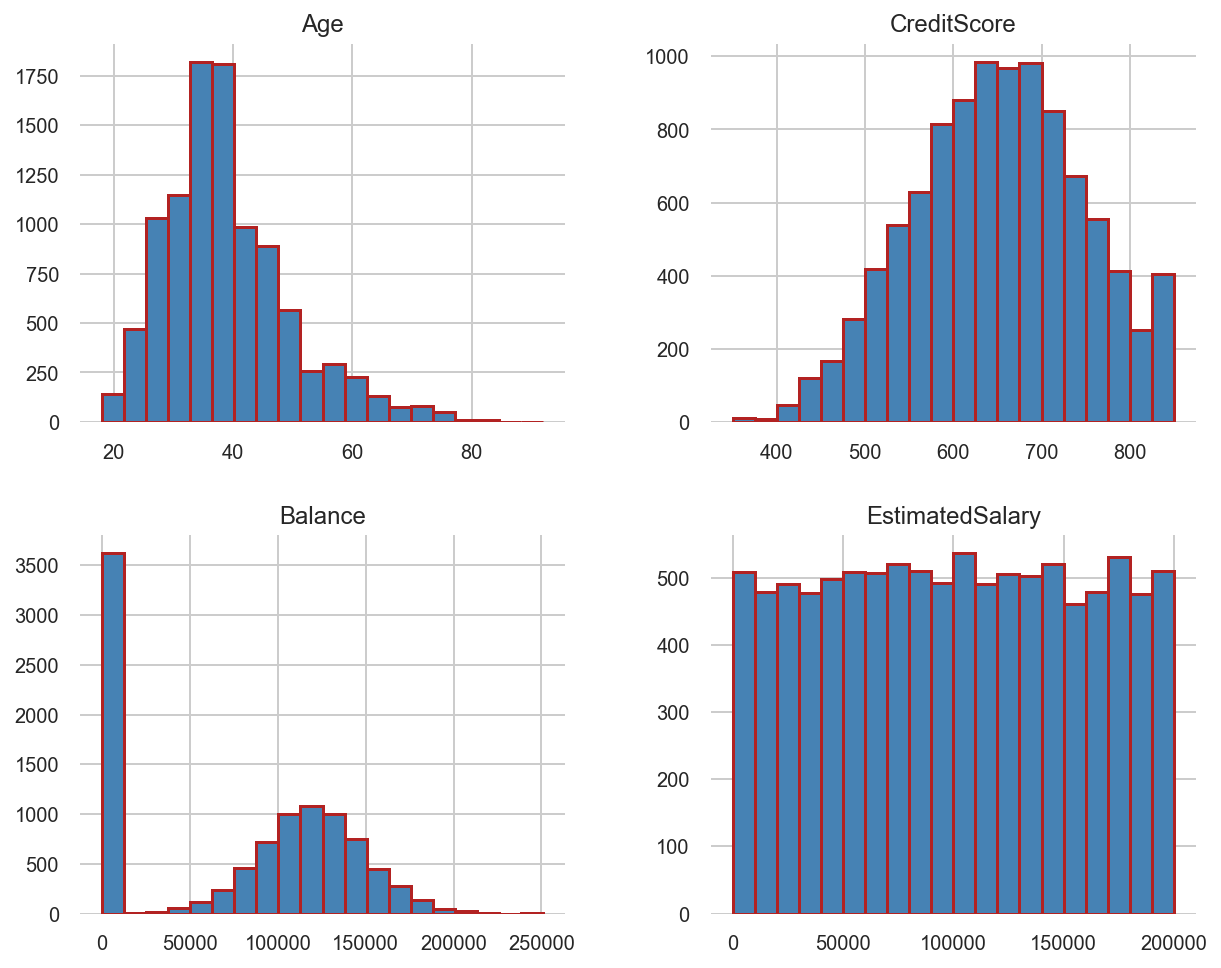

In [8]:
continuous = ['Age','CreditScore','Balance','EstimatedSalary']
df[continuous].hist(figsize =(10,8), bins = 20, layout=(2,2), color = 'steelblue', edgecolor = 'firebrick', linewidth = 1.5)

### Observations:

1. 'Age' is slightly tail-heavy, i.e. it extends more further to the right of the median than to the left
 
 automated test for normaility


2. Most values for 'CreditScore' are above 600
3. If we ignore the fist bin, 'Balance' follows a fairly normal distribution
4. The distribution of 'EstimatedSalary' is more or less uniform and provides little information.



## Categorical Variables
Let's plot a countplot for each categorical feature:

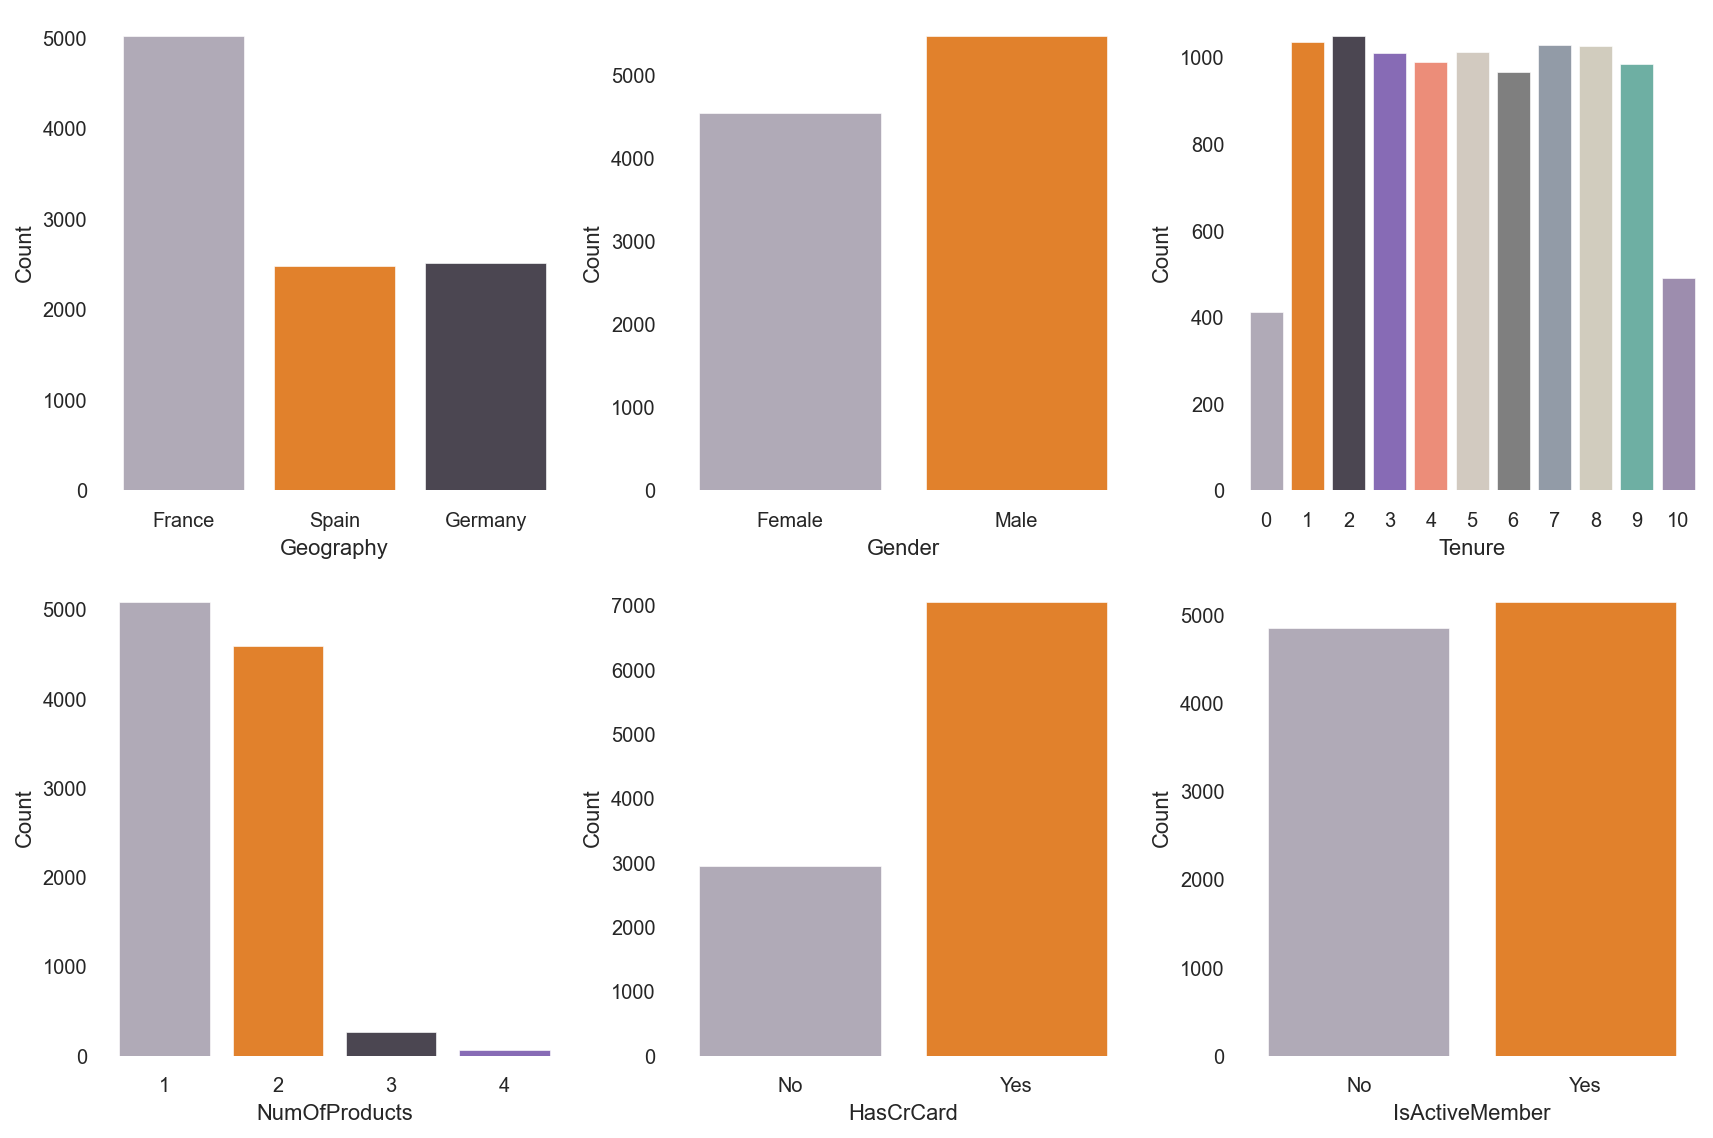

In [9]:
colors2 = ['#B0A8B9', '#ff7f0e', '#4B4453', '#845EC2', '#FF8066', '#D5CABD', 
           '#7f7f7f', '#8f9aaa', '#d4cebb',  '#63BAAA', '#9D88B3']

cat_vars = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
df_cat = df[cat_vars]

fig, ax = plt.subplots(2, 3, figsize = (12, 8))

for index, column in enumerate(df_cat.columns):

    plt.subplot(2, 3, index + 1)
    sns.countplot(x = column, data = df, palette = colors2)
    
    plt.ylabel('Count')
    if (column == 'HasCrCard' or column == 'IsActiveMember'): 
        plt.xticks([0, 1], ['No', 'Yes'])

plt.tight_layout();

### Observations:

1. The bank has customers in three countries (France, Spain, and Germany). Most customers are in France.
2. There are more male customers than females
3. Only a small percentage leaves within the first year. The count of customers in tenure years between 1 and 9 is almost the same,
4. Most of the customers have purchased 1 or 2 products, while a small portion has purchased 3 and 4,
5. A significant majority of customers has a credit card, and
6. Almost 50% of customers are not active.

In [10]:
def plot_continuous(feature):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
    
    sns.distplot(df_remained[feature], bins = 15, color = colors[0], label = 'Remained', 
                 hist_kws = dict(edgecolor = 'firebrick', linewidth = 1), ax = ax1, kde = False)
    sns.distplot(df_churned[feature], bins = 15, color = colors[1], label = 'Churned', 
                 hist_kws = dict(edgecolor = 'firebrick', linewidth = 1), ax = ax1, kde = False)
    ax1.set_title('{} distribution - Histogram'.format(feature))
    ax1.set_ylabel('Counts')
    ax1.legend()

    sns.boxplot(x = 'Exited', y = feature, data = df, palette = colors, ax = ax2)
    ax2.set_title('{} distribution - Box plot'.format(feature))
    ax2.set_xlabel('Status')
    ax2.set_xticklabels(['Remained', 'Churned'])

    plt.tight_layout();

In [11]:
def plot_categorical(feature):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))
    sns.countplot(x = feature, hue = 'Exited', data = df, palette = colors, ax = ax1)
    ax1.set_ylabel('Counts')
    ax1.legend(labels = ['Retained', 'Churned'])
    
    sns.barplot(x = feature, y = 'Exited', data = df, palette = colors2 , ci = None, ax = ax2)
    ax2.set_ylabel('Churn rate')
    
    if (feature == 'HasCrCard' or feature == 'IsActiveMember'):
        ax1.set_xticklabels(['No', 'Yes'])
        ax2.set_xticklabels(['No', 'Yes'])
    
    plt.tight_layout();

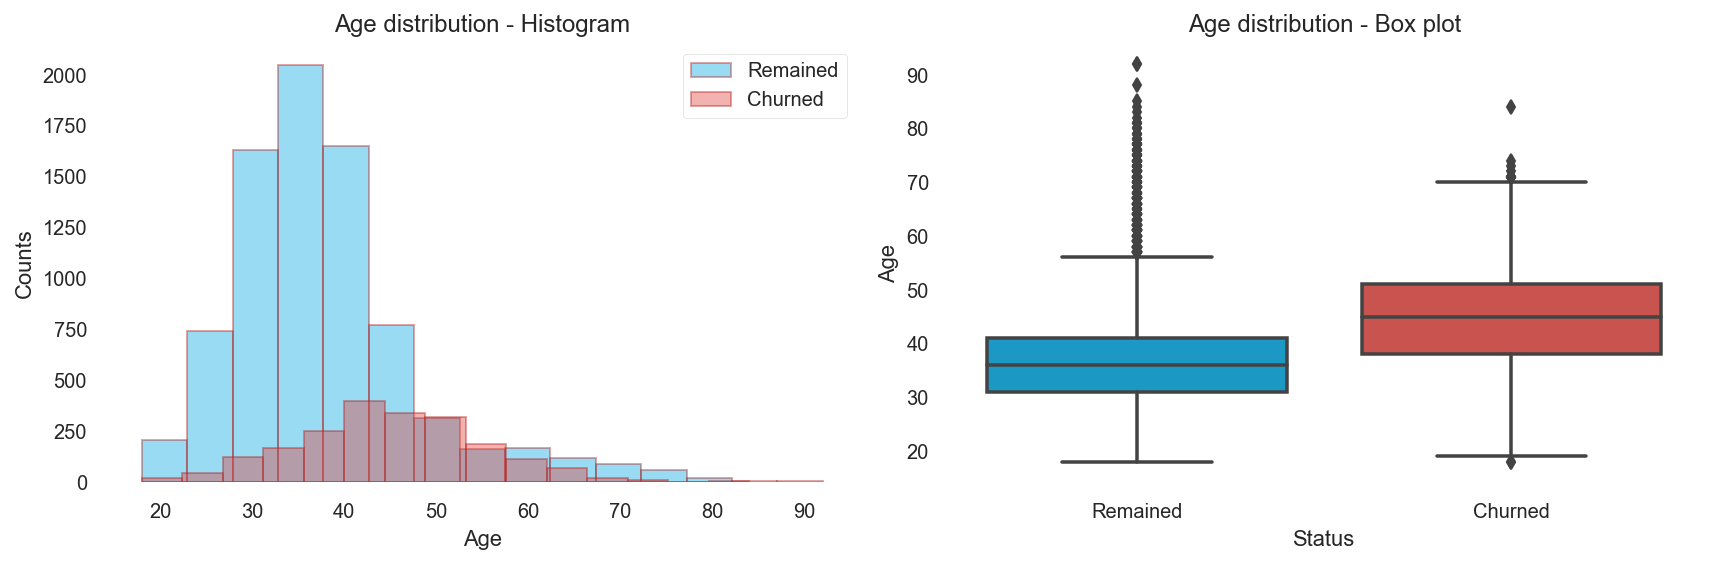

In [12]:
df_churned = df[df['Exited'] == 1]
df_remained = df[df['Exited'] == 0]

plot_continuous('Age')

There is a clear difference between age groups since older customers are more likely to churn. This could potentially indicate that preferences change with age, and the bank hasn't adapted its strategy to meet the requirements of older customers.

It clear that 50% likely to leave if 50.. 

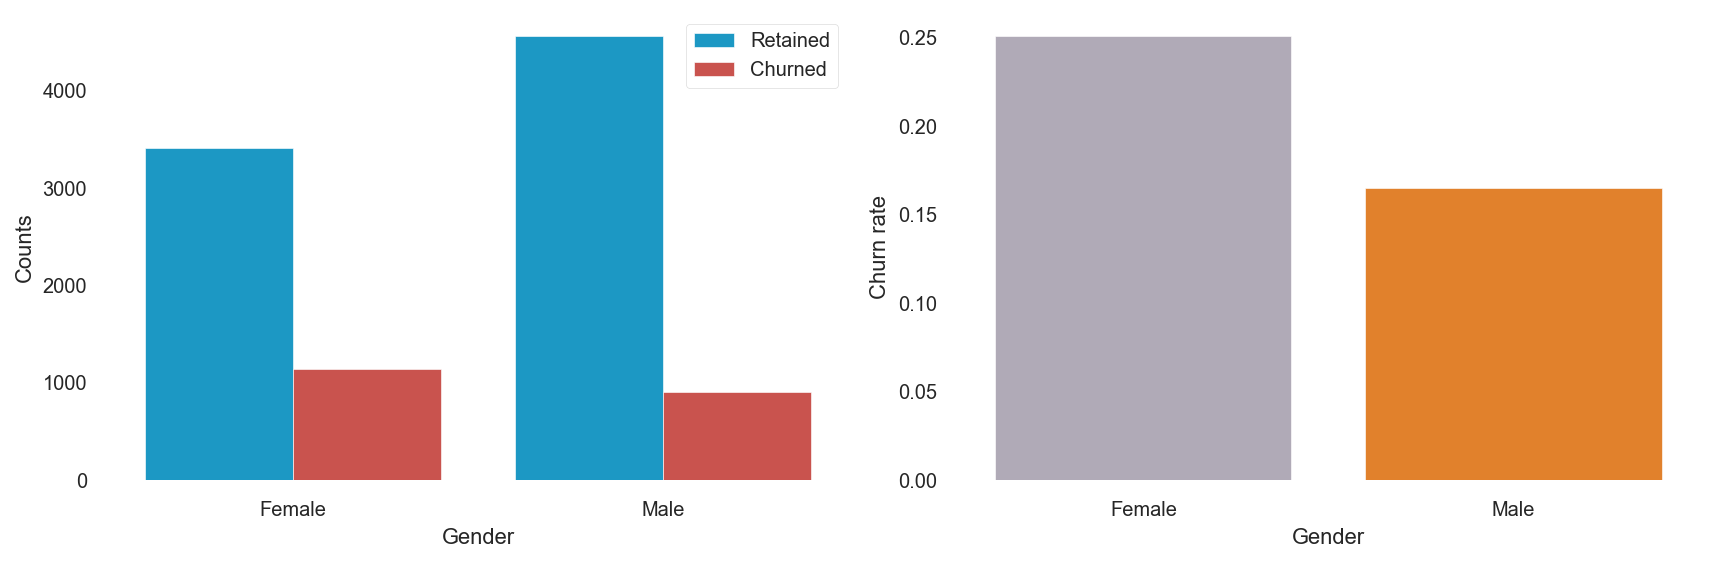

In [13]:
plot_categorical('Gender')

Female customers are more likely to churn.   ( which is more imp age or gender) 

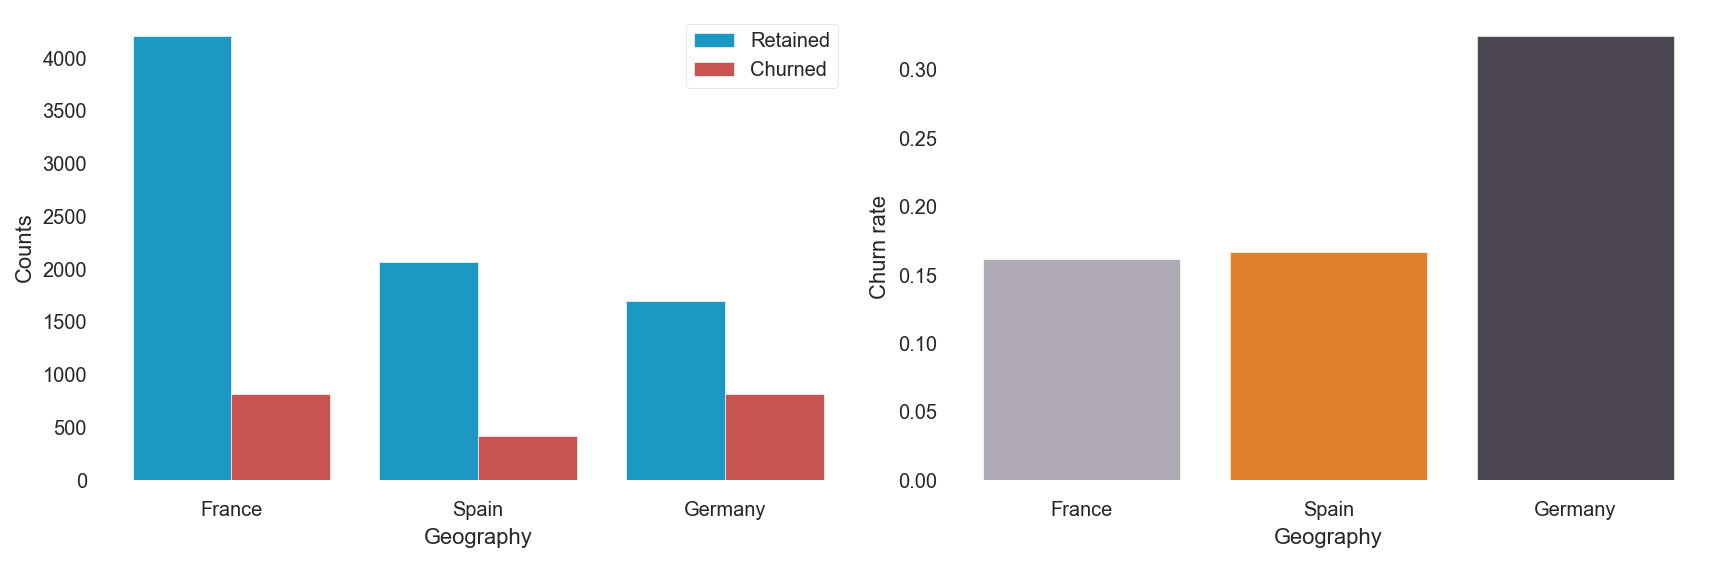

In [14]:
plot_categorical('Geography')

Customers in Germany are more likely to churn than customers in the other two countries (the churn rate is almost double compared to Spain and France). Many reasons could explain this finding such as higher competition or different preferences for German customers.

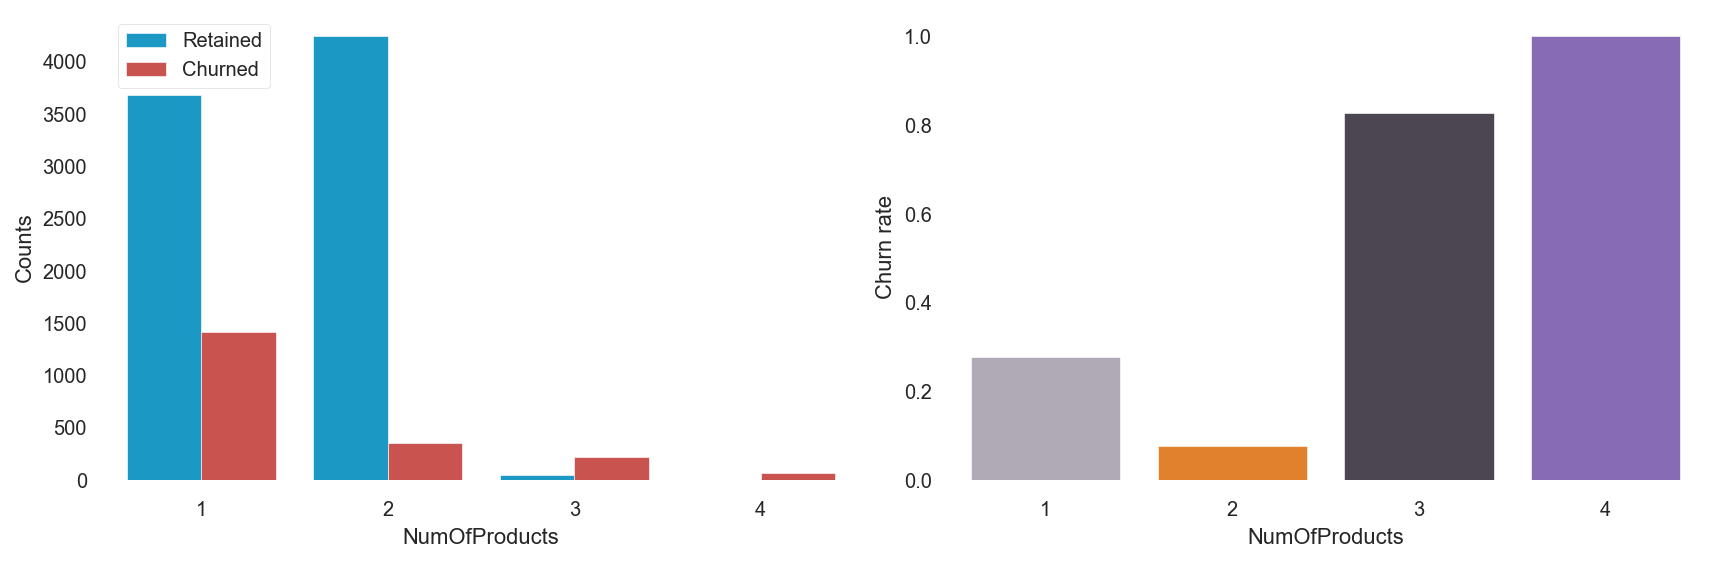

In [15]:
plot_categorical('NumOfProducts')

having 3 or 4 products significantly increases the likelihood of churn.

I am not sure how to interpret this result. It could potentially mean that the bank is unable to properly support customers with more products which in turn increases customer dissatisfaction.

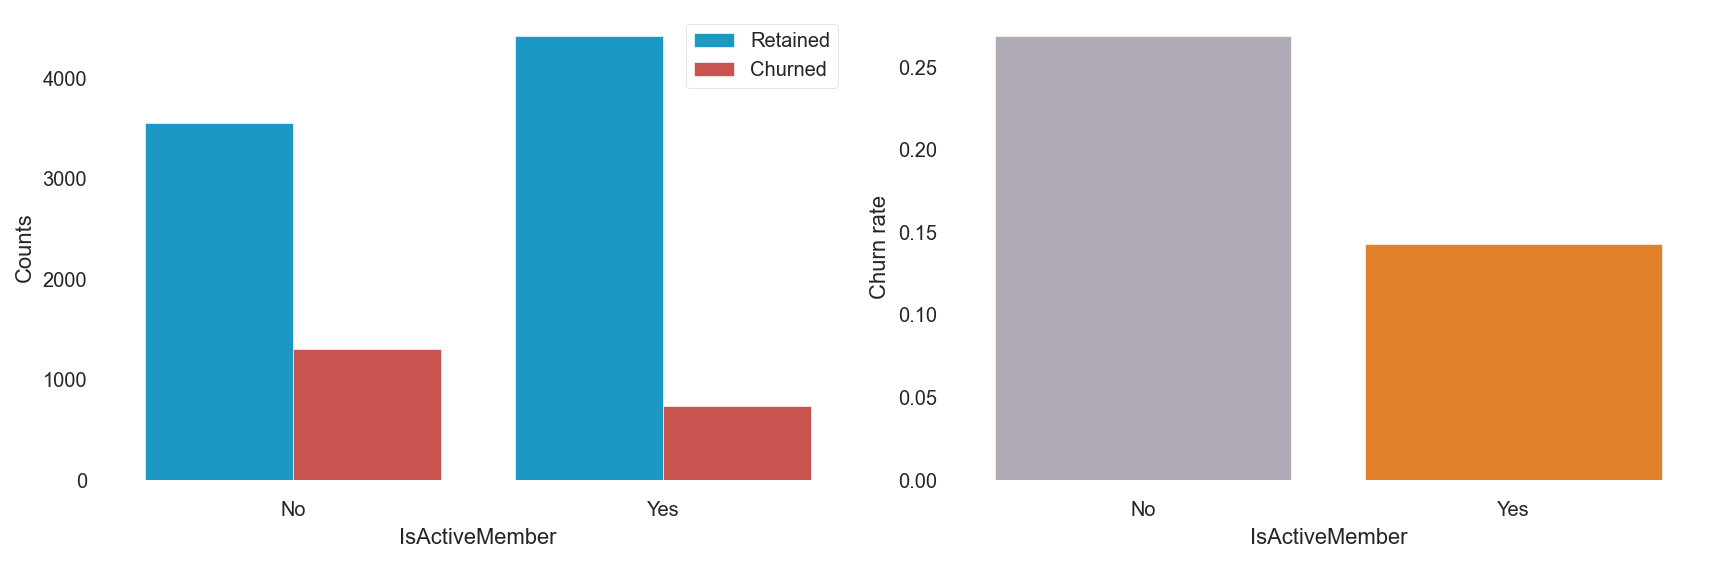

In [16]:
plot_categorical('IsActiveMember')

It's not a surprise that inactive customers are more likely to churn. A big portion of the clientele is inactive; therefore, the bank will definitely benefit from changing its policy so that more customers become active.

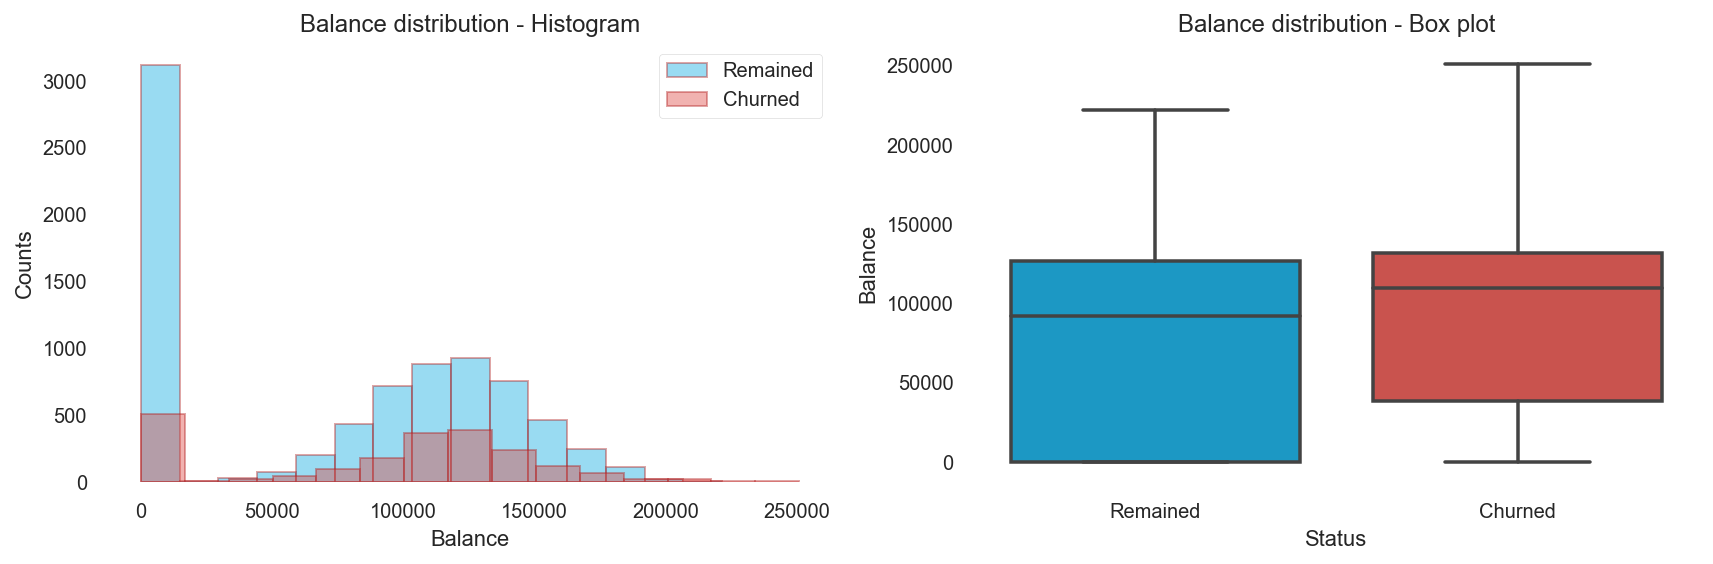

In [17]:
plot_continuous('Balance')

The two distributions are quite similar. There is a big percentage of non-churned customers with a low account balance.

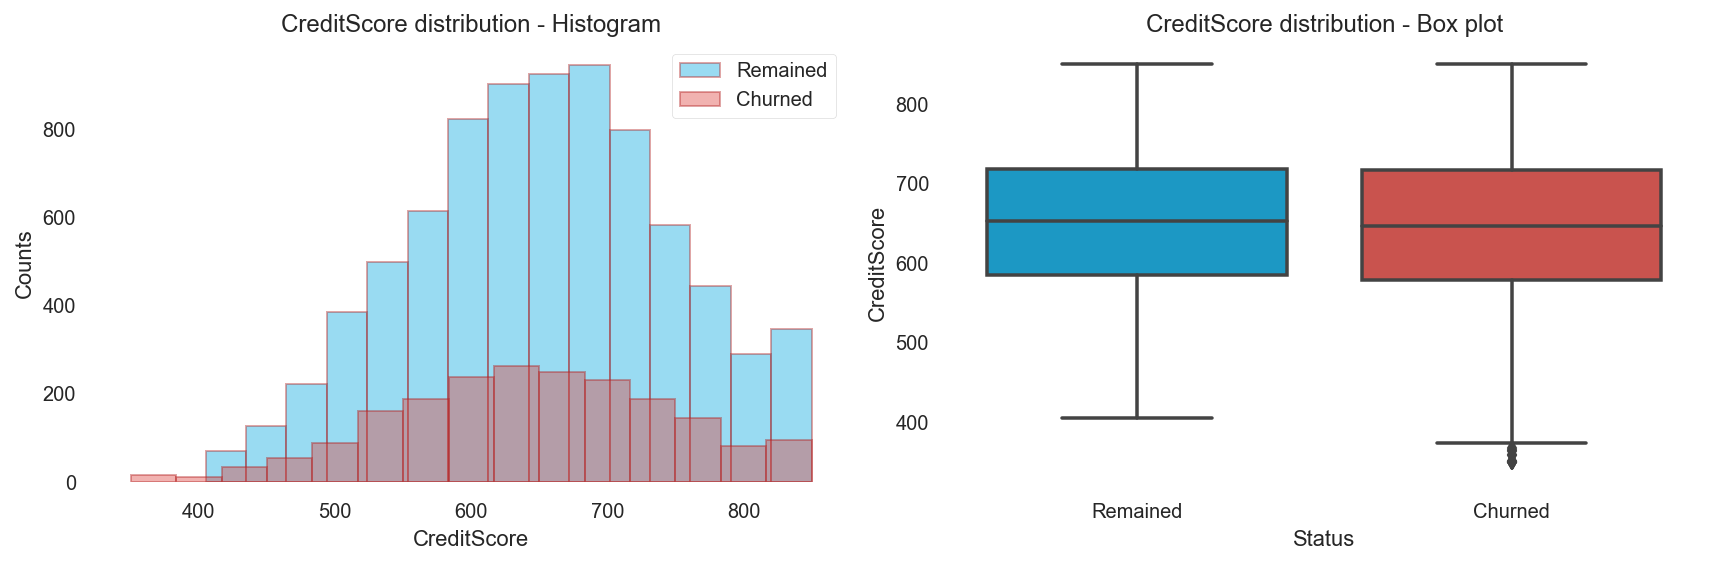

In [18]:
plot_continuous('CreditScore')

There is no significant difference between retained and churned customers in terms of their credit score.

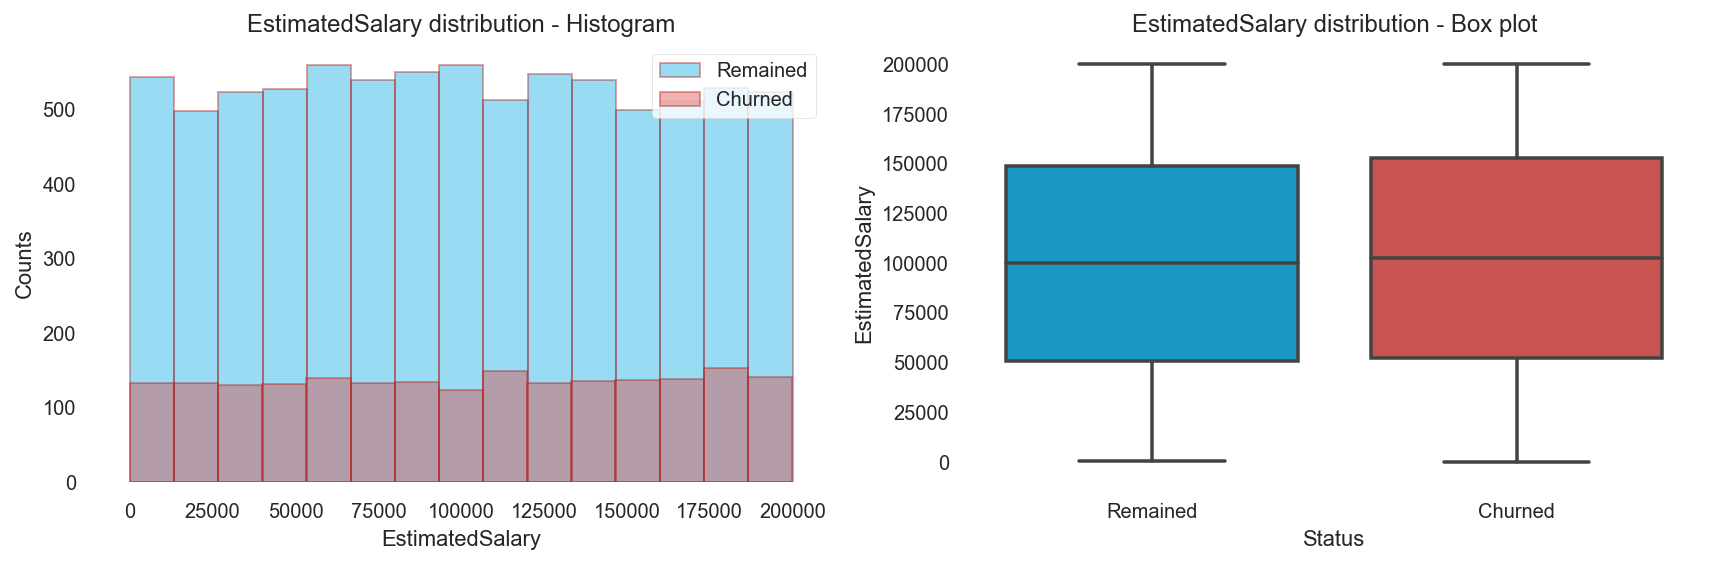

In [19]:
plot_continuous('EstimatedSalary')

Both churned and retained customers display a similar uniform distribution for their salary. Consequently, we can conclude that salary doesn't have a significant effect on the likelihood to churn.

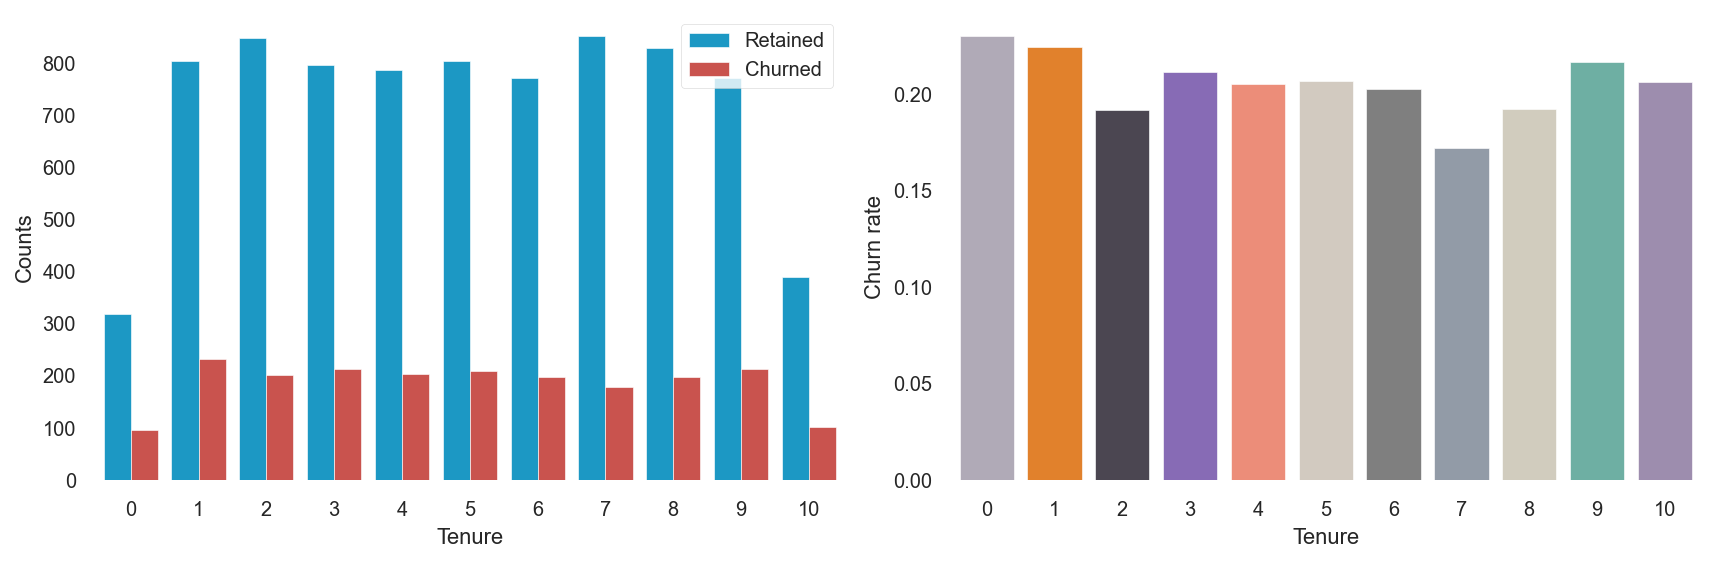

In [20]:
plot_categorical('Tenure')

Tenure does not seem to affect the customer churn. It is most likely for customers to churn either at the start or end of the tenure

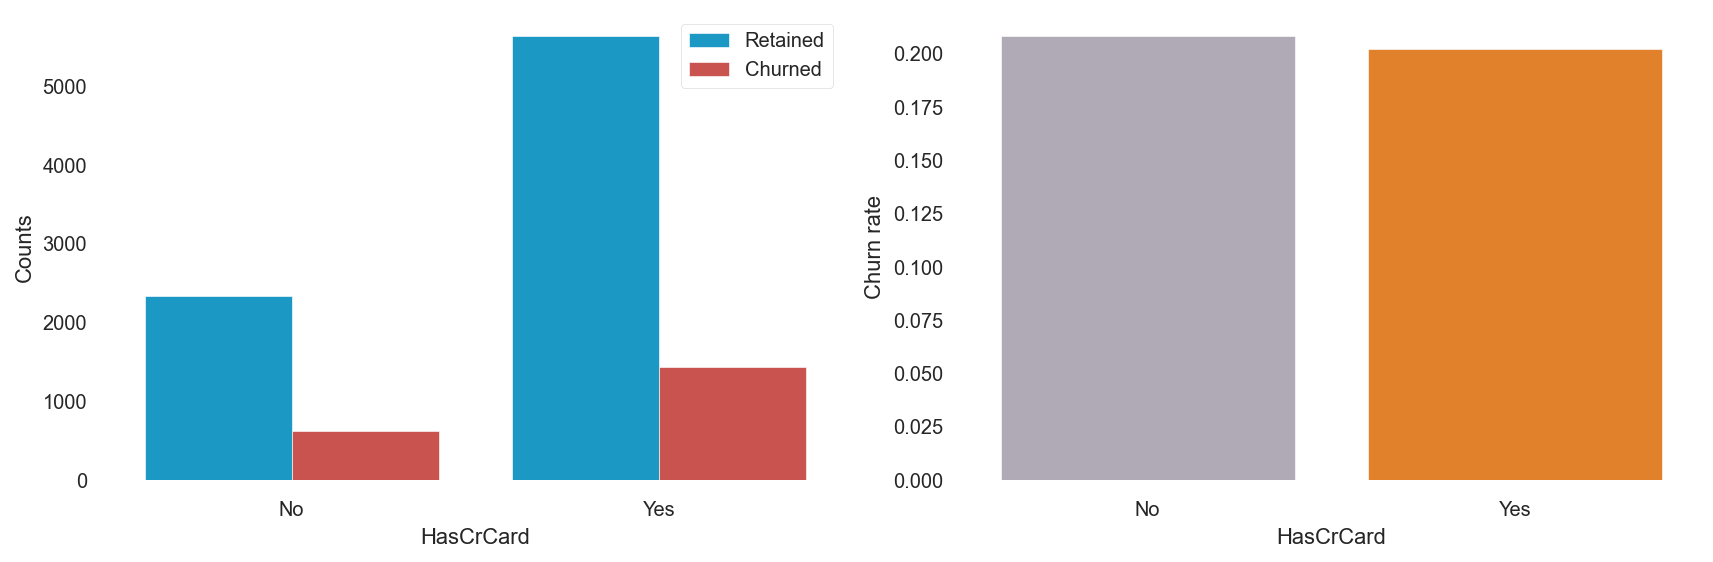

In [21]:
plot_categorical('HasCrCard')

Having a credit card doesn't seem to affect the churn rate.

## 4. Data Preprocessing

Data preprocessing is the process of converting raw data into a well-readable format that is suitable for building and training Machine Learning models.

Encoding Categorical Features:

Machine learning algorithms usually require that all input (and output) features are numeric. Consequently, categorical features need to be converted (encoded) to numbers before using them for building models.

In this dataset, geography and gender was encoded.

In [5]:
# One-Hot encoding the categorical attributes
list_cat = ['Geography', 'Gender']
df = pd.get_dummies(df, columns = list_cat, prefix = list_cat)
#df.head()

In [6]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography_France',
            'Geography_Germany','Geography_Spain','Gender_Female','Gender_Male']
df = df[continuous_vars + cat_vars + ['Exited']]
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,101348.88,1,1,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,1,0,0,1,1,0,0
2,502,42,8,159660.80,3,113931.57,1,0,1,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,79084.10,1,1,0,0,1,1,0,0


## 6. Feature Selection:

Already performed feature selection by dropping columns 'RowNumber', 'CustomerId', and 'Surname' at the beginning of the notebook. EDA revealed several more features that can be dropped as they do not provide any value in predicting our target variable:

In [229]:
# Identify the features with the most importance for the outcome variable exited

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df.drop('Exited', axis=1)  
y = df.Exited  

#Using 'SelectKBest method to identify most important features
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']   

#SOrting features by 'scores'
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,Geography_Germany,225.464
7,IsActiveMember,118.199
11,Gender_Female,61.909
1,Age,57.832
8,Geography_France,54.924
12,Gender_Male,51.540
3,Balance,28.503
10,Geography_Spain,20.867
4,NumOfProducts,5.055
0,CreditScore,0.456


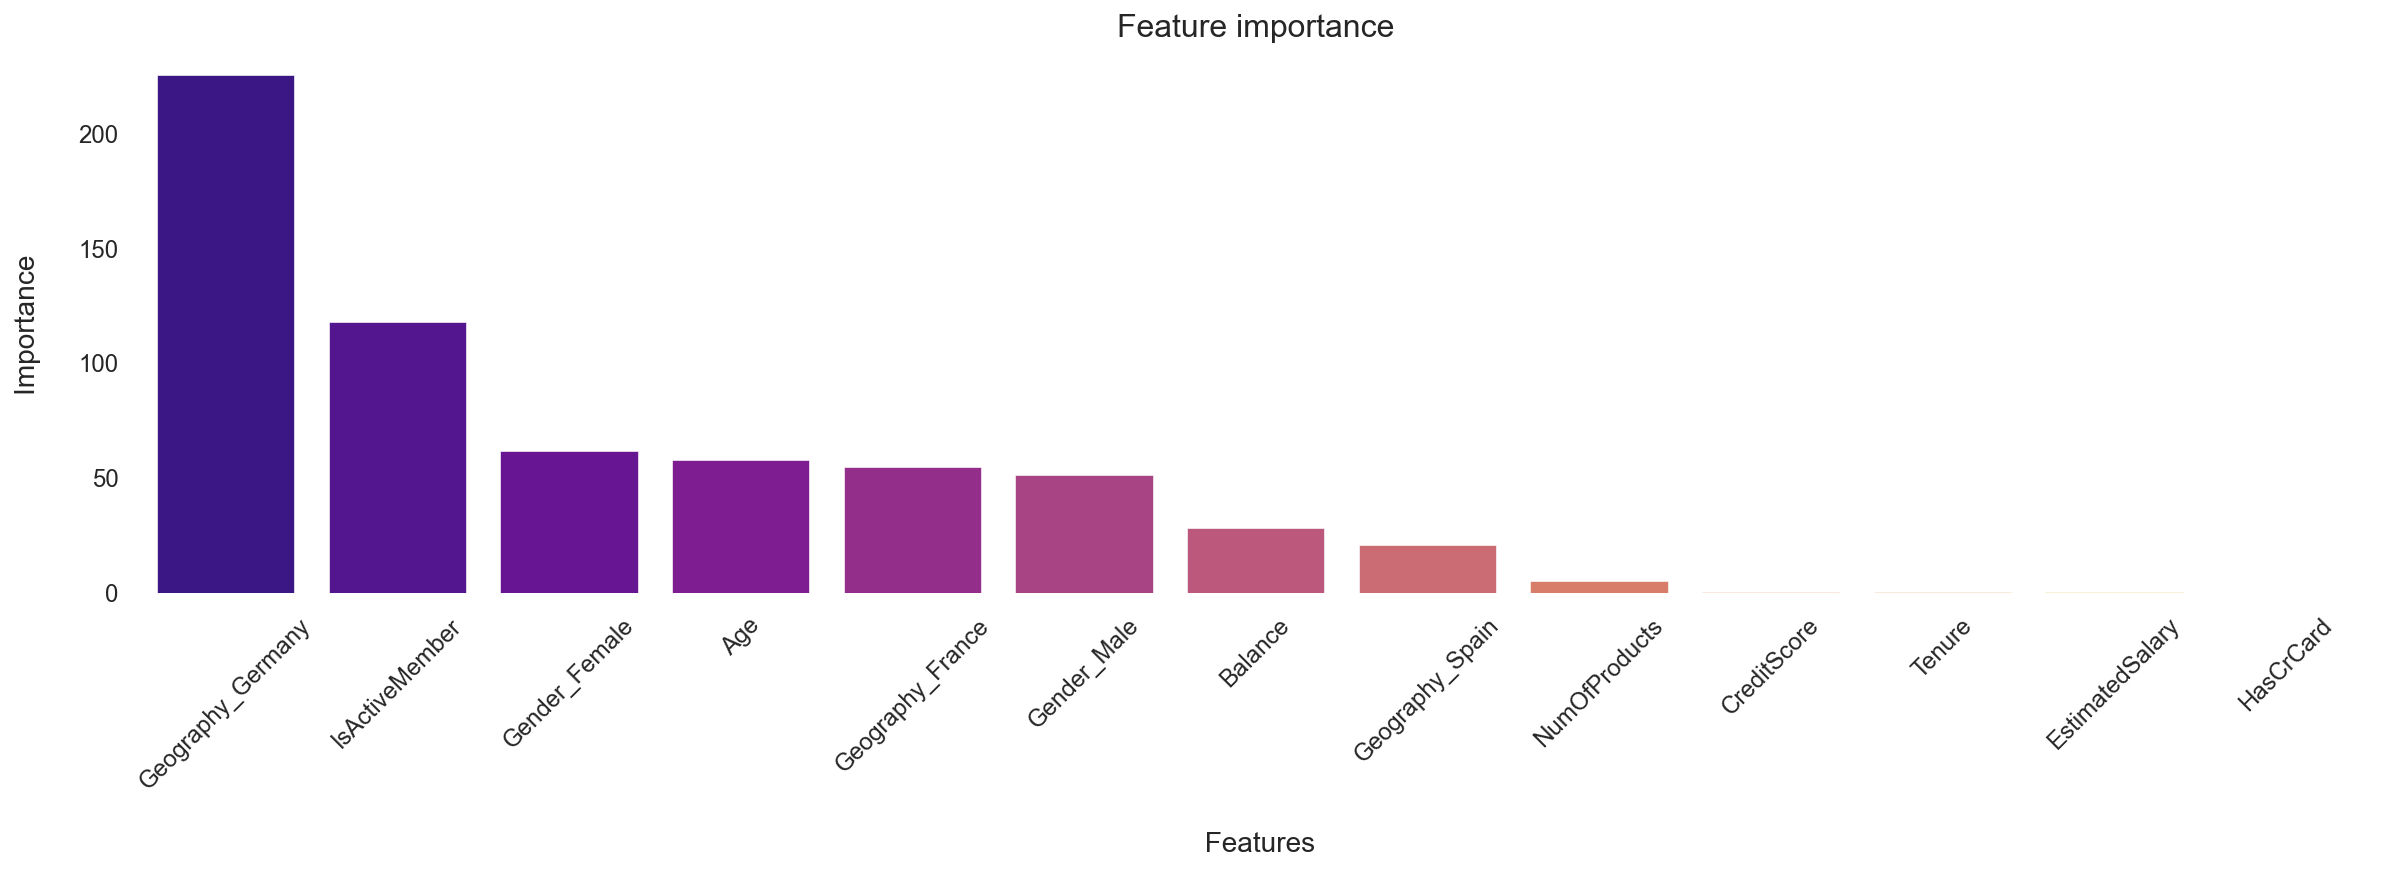

In [230]:
#Plot for visualization of feature importance

plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "plasma")
plt.box(False)

plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12, rotation = 45)
plt.yticks(fontsize=12)

plt.show()

#### Observations:

From the above graph it can be concluded that CreditScore, Tenure, EstimatedSalary and HasCreditCard has very less impact on predicting whether a customer will churn or not.

The features that most impact the prediction are:
1. Geography
2. IsActiveMember
3. Gender
4. Age
5. Balance
6. Number of products

In [25]:
# New dataframe with important features
df_bank = df[['Geography_Germany','IsActiveMember', 'Gender_Female', 'Age', 'Geography_France',
              'Gender_Male', 'Balance','Geography_Spain','NumOfProducts','CreditScore','Tenure',
              'EstimatedSalary','HasCrCard','Exited']]

## 7. Train test split

The code below splits the training data. Using 75%  of the training data for actual training purposes, and once training is completed, using the remaining  25%  of the training data to check the training accuracy of the trained model.

In [8]:
pip install h2o

Note: you may need to restart the kernel to use updated packages.
  Created wheel for h2o: filename=h2o-3.32.0.4-py2.py3-none-any.whl size=164670985 sha256=e056b218d05508342818c6f23ef0536b86a4627d4979bd9348d1c5bde4bd1cd9
  Stored in directory: c:\users\prana\appdata\local\pip\cache\wheels\d1\f7\6c\9b38493248da54c5c5f6b2d168a16ea00e533b78a502fa1c24
Successfully built h2o


In [1]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [5]:
# Use 50% of availible resources
import h2o
from h2o.automl import H2OAutoML
import psutil
import random, os, sys

pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [6]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:53365 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_201"; Java(TM) SE Runtime Environment (build 1.8.0_201-b09); Java HotSpot(TM) 64-Bit Server VM (build 25.201-b09, mixed mode)
  Starting server from /Users/bear/.local/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpsz_yqrmc
  JVM stdout: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpsz_yqrmc/h2o_bear_started_from_python.out
  JVM stderr: /var/folders/lh/42j8mfjx069d1bkc2wlf2pw40000gn/T/tmpsz_yqrmc/h2o_bear_started_from_python.err
  Server is running at http://127.0.0.1:53365
Connecting to H2O server at http://127.0.0.1:53365 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,15 days
H2O_cluster_name:,H2O_from_python_bear_gp5wl2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.556 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [13]:
df_hex = h2o.H2OFrame(df)
# Create a 80/20 train/test splie
pct_rows=0.80
df_train, df_test = df_hex.split_frame([pct_rows])

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
print(df_train.shape)
print(df_test.shape)

(7975, 14)
(2025, 14)


In [18]:
# Set the features and target
X=df_hex.columns
print(X)
y='Exited'
X.remove(y) 
print(X)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [20]:
df_hex[y] = df_hex[y].asfactor()
df_hex.types

{'RowNumber': 'int',
 'CustomerId': 'int',
 'Surname': 'enum',
 'CreditScore': 'int',
 'Geography': 'enum',
 'Gender': 'enum',
 'Age': 'int',
 'Tenure': 'int',
 'Balance': 'real',
 'NumOfProducts': 'int',
 'HasCrCard': 'int',
 'IsActiveMember': 'int',
 'EstimatedSalary': 'real',
 'Exited': 'enum'}

In [22]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [23]:
aml.train(x=X,y=y,training_frame=df_train)  

AutoML progress: |
00:51:25.664: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
00:51:29.696: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.


00:51:32.707: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
00:51:36.728: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before t

In [25]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_3_AutoML_1_20220106_05125,0.103028,0.32098,0.103028,0.208259,0.225493
StackedEnsemble_AllModels_2_AutoML_1_20220106_05125,0.103199,0.321246,0.103199,0.20838,0.225694
StackedEnsemble_BestOfFamily_4_AutoML_1_20220106_05125,0.10336,0.321496,0.10336,0.209482,0.225756
StackedEnsemble_AllModels_1_AutoML_1_20220106_05125,0.103455,0.321644,0.103455,0.209641,0.226208
StackedEnsemble_BestOfFamily_3_AutoML_1_20220106_05125,0.103678,0.32199,0.103678,0.209392,0.226225
GBM_grid_1_AutoML_1_20220106_05125_model_2,0.104108,0.322658,0.104108,0.216473,0.226161
StackedEnsemble_BestOfFamily_2_AutoML_1_20220106_05125,0.104496,0.323258,0.104496,0.211774,0.227357
GBM_grid_1_AutoML_1_20220106_05125_model_12,0.104532,0.323314,0.104532,0.210992,0.226807
GBM_2_AutoML_1_20220106_05125,0.104747,0.323646,0.104747,0.213828,0.227033
StackedEnsemble_BestOfFamily_1_AutoML_1_20220106_05125,0.105025,0.324075,0.105025,0.214612,0.228315
